# Wine Data Set
Authors:  
- Minh Duc Ngo  
- Catharina Hoppensack  

This notebook is our own work. Any other sources have been clearly marked and cited.

All authors contributed equally.

# 1 Environment
- Python version: (3.10.19) 3.11.7  
- OS: Windows 11  
- Environment: Visual Studio Code

### Packages
- pandas
- .. zu erweitern, eventuell Requirements.txt

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

# 2 Load Data 
Describe in detail their origin, content, structures and data types.

### Description of Data (Duc)

The data is loaded from an URL-Link and saved in a variable. With the help of pandas, we can read the csv file and safe the data, thats seperated by a semicolon.

origin= archive.ics.uci.edu

        - UC Irvine, Maschine Learning Repository
        - has 683 datasets currently

content = 
- data length is 1599 = count
- 12 kinds of features:  
    - fixed acidity :  
            - min   4.60  
            - max   15.9  
            - mean  8.3  
            - std   1.7  
            -> huge gap, but that might be an exception  
            -> mostly around 8.3 with 1.7 deviation : 7-10  
    - volatile acidity :  
            - min   0.12  
            - max   1.58  
            - mean  0.527 ~ 0.53  
            - std   0.179 ~ 0.18  
    - citric acid :  
            - min   0.0  
            - max   1.0  
            - mean  0.27  
            - std   0.19  
    - residual sugar:  
            - min   0.9  
            - max   15.5  
            - mean  2.538 ~ 2.54  
            - std   1.40  
              
  several features/themes related to the wine: chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality  
- all have these subfeatures: count, mean, std, min, 25%,50%,75%,max
- categories focus on wine content, what its made of
structures = 
    - 3x4 columns
    - the subfeatures on the left side 
    - maybe categorized? 

data types =  only float numbers can be seen, except 1 int for the quality.



In [11]:
url  = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")
print(df.describe(include='all'))


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

# 3  Data Exploration (Duc & Cathy)
Prepare statistical and visual data summaries.  

How many variables/features does the data contain, how many samples? Are there missing values? Explore correlations among variables and conduct at least one unsupervised analysis. Consider variable transformations and normalizations where applicable.


In [12]:
(print("Statistical Summary:"))
print(df.info())
print(df.shape)
print("/nMissing Values in each column:")
print(df.isna().sum())




Statistical Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
(1599, 12)
/nMissing Values in each column:
fixed acidity           0
volatile acidity        0
citr

- 12 features/variables 
- no missing values
- all numerical, all float, 1 int (quality)
- 1599 samples/rows: 0 - 1598

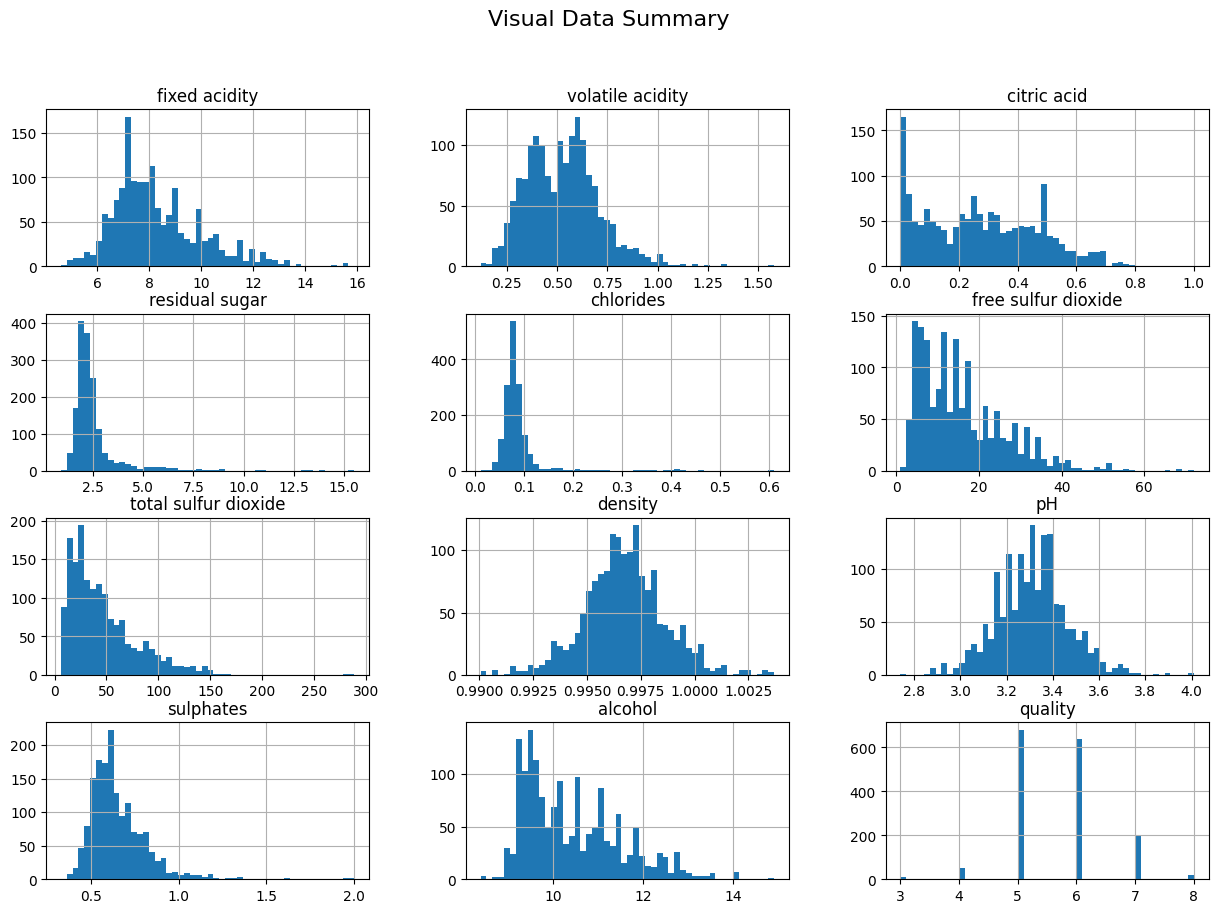

In [13]:
df.hist(figsize=(15,10), bins=50) #bins anpassen
plt.suptitle("Visual Data Summary", fontsize=16)
plt.show()

Now we take a look at any duplicates in the dataframe.

In [14]:
dups = df.duplicated().sum()
print("Duplicates:", dups)

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

Duplicates: 240


Since there are some duplicates, we decided to get rid of them to avoid disproportional weighting on certain datasets.  
It must be stated, that these measures can be coincidentally if certain wine types happen to have similar values in each feature. It can also be, that accidentally certain wines were tested multiple times.

In [15]:
print("Vorher   :", df.shape)
df_noDuplicates = df.drop_duplicates()
print("Nachher  :", df_noDuplicates.shape)

Vorher   : (1599, 12)
Nachher  : (1359, 12)


- df -> df_noDuplicate
- bessere Abgrenzung/Unterscheidung
- Originales df, mit Duplikaten, bleibt erhalten

The following charts show how the values in each feature live on different scales. We can also see some skewness in some of the features, for example in residual sugar.

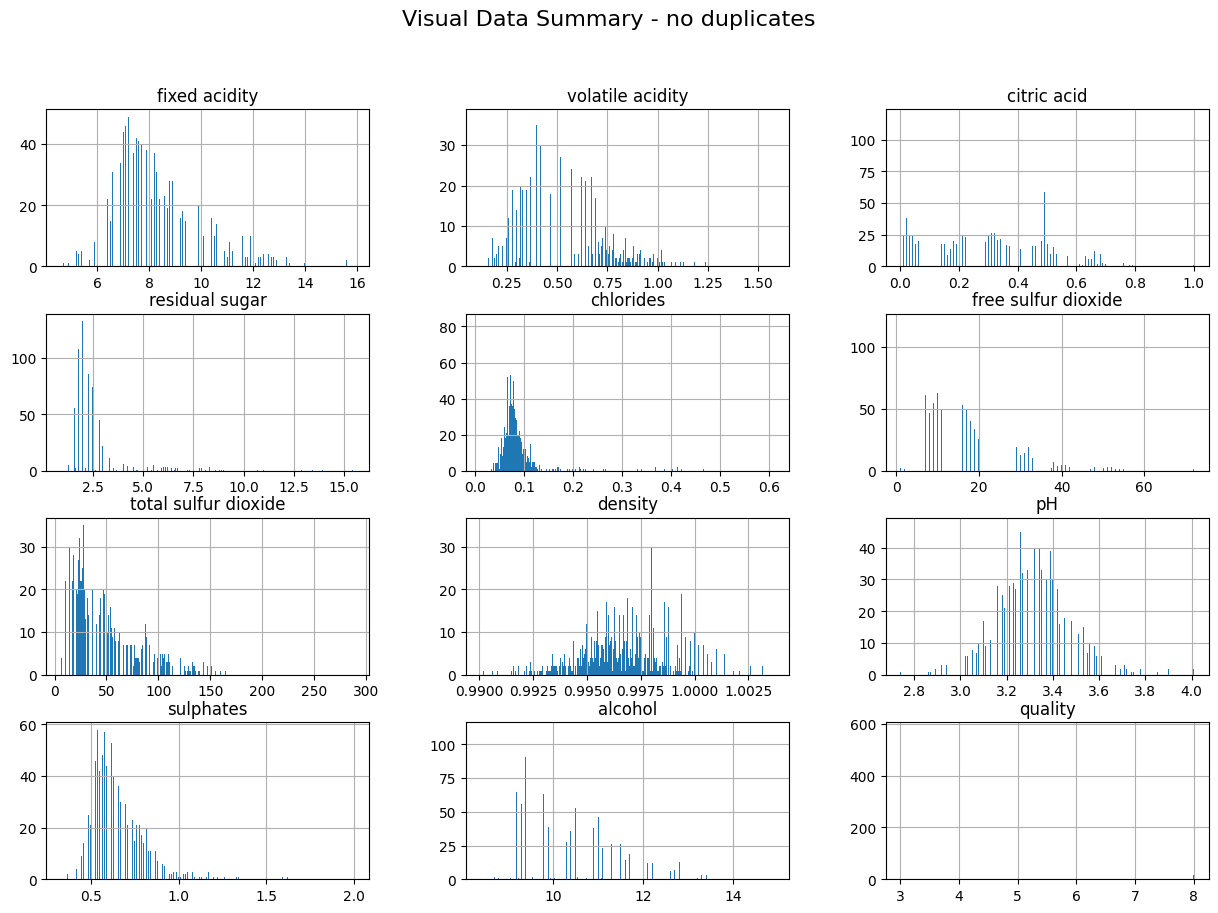

In [24]:
df_noDuplicates.hist(figsize=(15,10), bins=500) #bins anpassen
plt.suptitle("Visual Data Summary - no duplicates", fontsize=16)
plt.show()
#Motivation: see distributions of features individually -> clear to see skewness, outliers, normality, less chaos
#Negative  : might be to big

#none equally distributed
#some skewed right: residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide
#some approx normal: fixed acidity, citric acid, pH, sulphates, alcohol
#some approx uniform: volatile acidity, density 

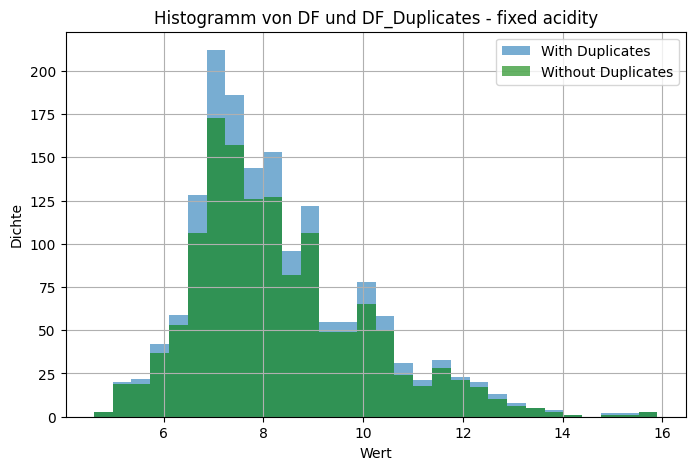

In [22]:
plt.figure(figsize=(8, 5))

# Beide Histogramme im gleichen Plot darstellen
plt.hist(df['fixed acidity'], bins=30, alpha=0.6, label ='With Duplicates')
plt.hist(df_noDuplicates['fixed acidity'], bins=30, alpha=0.6, color='green', label ='Without Duplicates')

# Achsenbeschriftung und Legende
plt.xlabel('Wert')
plt.ylabel('Dichte')
plt.title('Histogramm von DF und DF_Duplicates - fixed acidity')
plt.legend()
plt.grid(True)

plt.show()

### Log Transformation for every suitable Feature (Cathy)

As seen in the histograms below, the log-transformation reduces skewness. That means the large value range has been compressed. This helps to reduce the influence of extreme outliers.

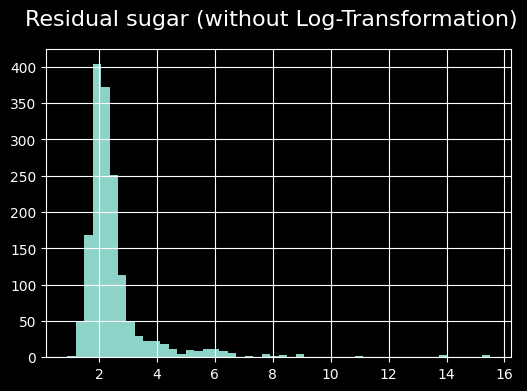

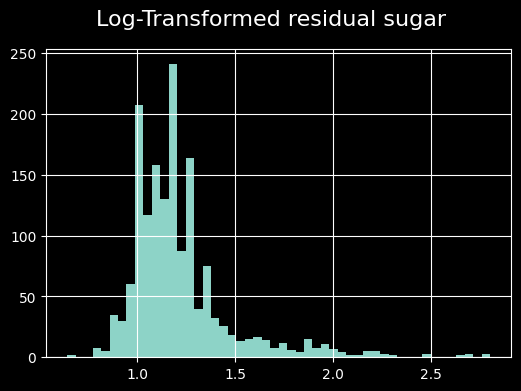

values before log transformation
count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64


values after log transformation
count    1599.000000
mean        1.218131
std         0.269969
min         0.641854
25%         1.064711
50%         1.163151
75%         1.280934
max         2.803360
Name: residual sugar, dtype: float64


In [ ]:
#Kopie damit Original nicht manipuliert wird zum Visualisieren
showcase_df = df.copy()

df["residual sugar"].hist(figsize=(6,4), bins=50)
plt.suptitle("Residual sugar (without Log-Transformation)", fontsize=16)
plt.show()


showcase_df['residual sugar'] = np.log1p(showcase_df['residual sugar'])
showcase_df["residual sugar"].hist(figsize=(6,4),bins=50)
plt.suptitle("Log-Transformed residual sugar", fontsize=16)
plt.show()

print("values before log transformation")
print(df["residual sugar"].describe())
print("\n")
print("values after log transformation")
print(showcase_df["residual sugar"].describe())
#log transformation to reduce skewness
#makes it more evenly distributed 
#more beautiful

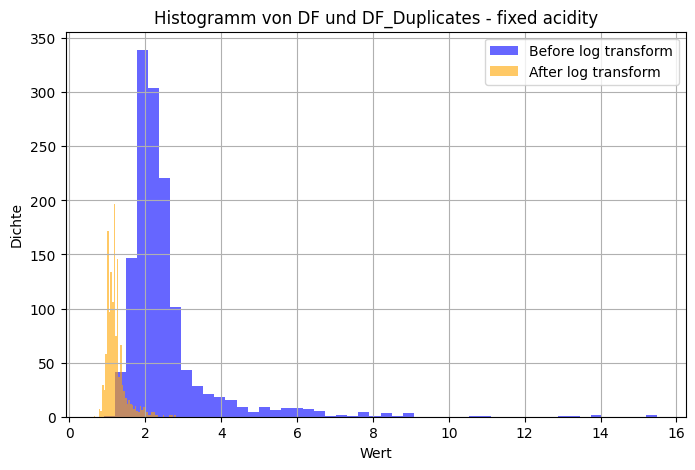

In [ ]:
showcase_df = df_noDuplicates.copy()

plt.figure(figsize=(8, 5))

# Beide Histogramme im gleichen Plot darstellen
plt.hist(df_noDuplicates['residual sugar'], bins=50, alpha=0.6, color='blue', label ='Before log transform')

showcase_df['residual sugar'] = np.log1p(showcase_df['residual sugar'])
plt.hist(showcase_df['residual sugar'], bins=50, alpha=0.6, color='orange', label ='After log transform')


# Achsenbeschriftung und Legende
plt.xlabel('Wert')
plt.ylabel('Dichte')
plt.title('Histogramm von DF und DF_Duplicates - fixed acidity')
plt.legend()
plt.grid(True)

# Anzeigen
plt.show()

- eine Vereinigung der df und df.log version
- alle behalten oder das einzelne / das paar entfernen  (Graph) ?

In the following code block, we apply this log-transformation to any feature whose skewness is greater than or equal to 1.

In [ ]:
#features OHNE Quality
features = ["fixed acidity", "volatile acidity", "citric acid", 
            "residual sugar", "chlorides", "free sulfur dioxide",
            "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
            
#zur Bestimmung, ob Transformation nötig ist
log_features = []
for feat in features:
    skew = df[feat].skew()
    if skew >= 1:
        log_features.append(feat)

    '''
    print(feat)
    print("Skewness vor:", df[feat].skew())
    print("Skewness nach:", np.log1p(df[feat]).skew())
    print("\n")
    '''
print("Relevant Features:\n")
for i in log_features:
    print(i)

Relevant Features:

residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
sulphates


- "Kopie des ursrünlgichen Dataframes", das Original oder die Version ohne Duplikate?

In [ ]:
#Kopie des ursprünglichen Dataframes
df_transformed = df.copy()

for logfeat in log_features:
    #neue Werte für transformierte Features
    df_transformed[logfeat] = np.log1p(df[logfeat])

To make it easier for the model to learn, we will normalize the data so the mean of each feature set is centered at 0.

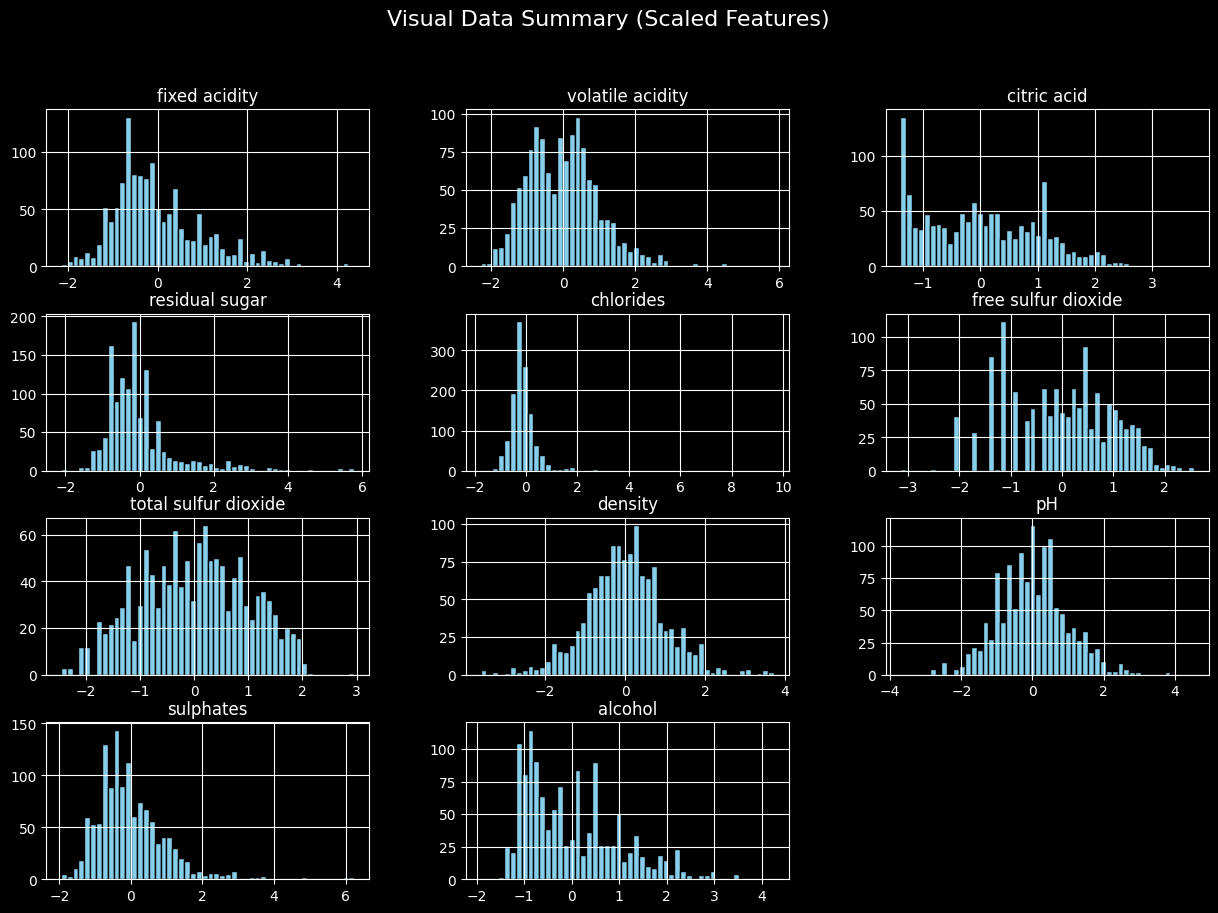

In [ ]:
#normalization
y = df['quality'] #defining target variable
X = df_transformed[features].values  #speichern der Daten fürs Training (alle außer quality)

scaler = StandardScaler()

#splitten beugt Leakage vor. Modell lernt nicht mit den schon richtigen Daten.
#Diese werden nur zur Überprüfung genutzt
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler.fit(X_train) #das fitten nur auf die trainingsdaten

#normalisierung auf beide
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

df_scaled = pd.DataFrame(X_train_scaled, columns=features)

df_scaled.hist(figsize=(15,10), bins=50, color='skyblue', edgecolor='black')
plt.suptitle("Visual Data Summary (Scaled Features)", fontsize=16)
plt.show()

#https://datascientest.com/de/train-test-split
#https://www.youtube.com/watch?v=_tex9QxBX-U

- intention das df mit den duplikaten oder ohne?

### Correlations between all features (Duc)

If the value rises proportional to the risen value of quality, then it's a positive correlation.  
If the value drops proportional to the sunken value of quality, then its a negative correlation.  
If they are irrelevant to each other, then its a neutral correlation.  

If the correlation is not neutral, the value of the chosen feature changes in proportion to the value of the correlation to Quality.


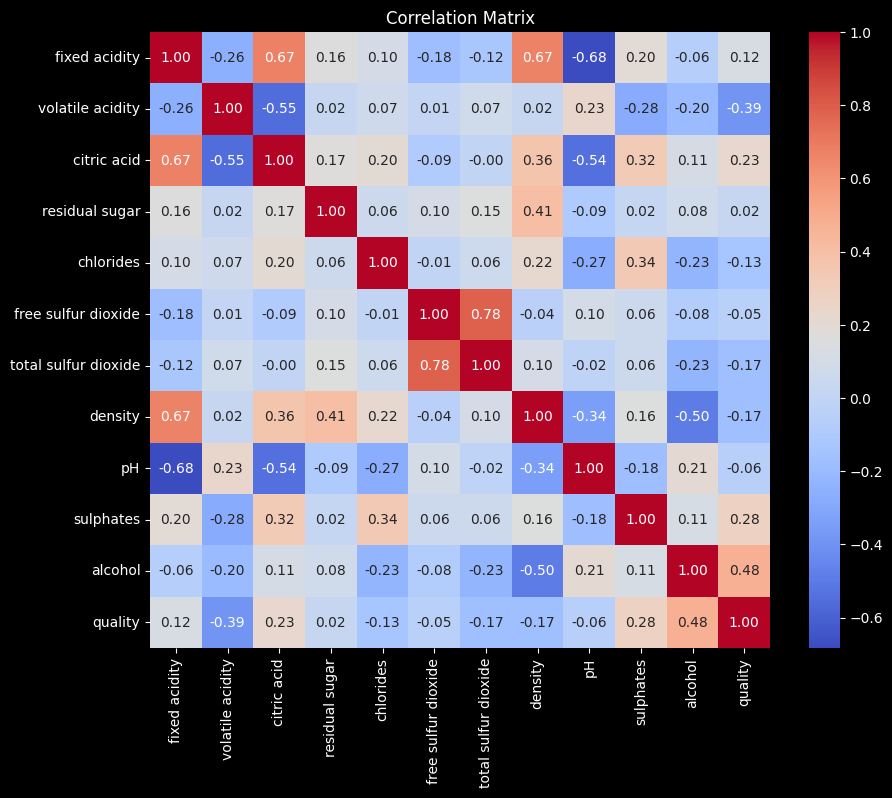

In [ ]:
corr_matrix = df_transformed.corr('pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Correlation with the feature "quality" (Duc)

In [ ]:
corr_with_quality = corr_matrix["quality"].sort_values(ascending=False)
print(corr_with_quality)


quality                 1.000000
alcohol                 0.476166
sulphates               0.280984
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.021687
free sulfur dioxide    -0.050344
pH                     -0.057731
chlorides              -0.134818
total sulfur dioxide   -0.171419
density                -0.174919
volatile acidity       -0.390558
Name: quality, dtype: float64


None of the features is neutral to quality.
Ex.: If quality rises by 1, then residual sugar rises by 0.013732

### Visualization of Correlation with Quality (Cathy)

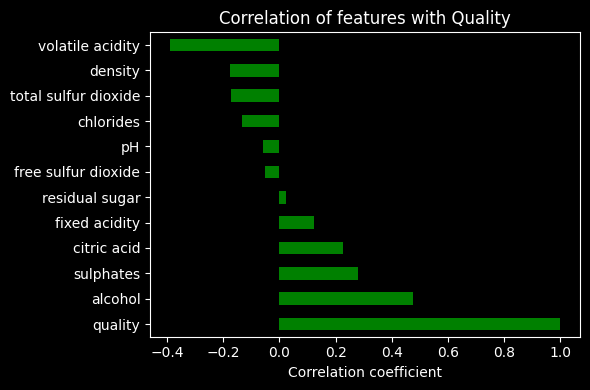

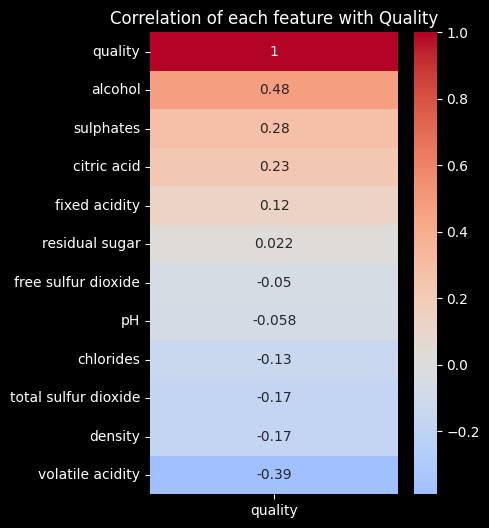

In [ ]:
plt.figure(figsize=(6,4))
corr_with_quality.plot(kind='barh', color='green')
plt.title("Correlation of features with Quality")
plt.xlabel("Correlation coefficient")
plt.tight_layout()
plt.show()

corr = df_transformed.corr(numeric_only=True)[["quality"]].sort_values(by="quality", ascending=False)

plt.figure(figsize=(4,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of each feature with Quality")
plt.show()

### Distribution of Wine Quality Values (Cathy)

The following chart shows the distribution of wine quality. As we can see, the most wines are around the wine quality value of 5 and 6.

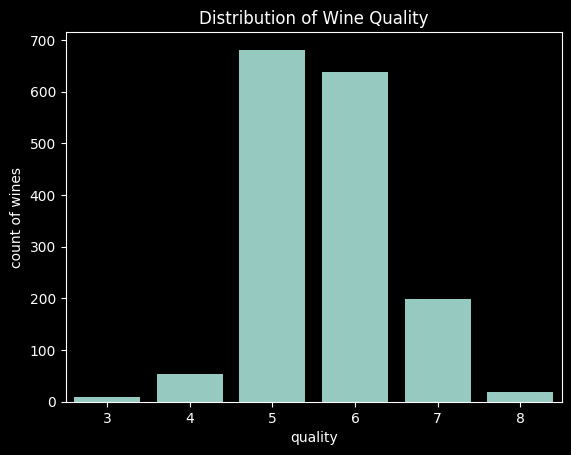

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
sns.countplot(x="quality", data=df_transformed)                    #zählt die Einträge in Quality für jeden Wert
plt.style.use("dark_background")
plt.title("Distribution of Wine Quality")
plt.xlabel("quality")
plt.ylabel("count of wines")
plt.show()

plt.style.available  #just to test some styles in the plotting

- is it necessary? 
- technically its already seen in the data visualisation 

### Unsupervised Clustering (Cathy)

The following plots show the correlation between features with the addition of differentiating between clusters. We can see a lot of overlapping between the clusters, but the overall picture is not entirely clear. Also there are way too many subplots to analyse.

In [ ]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X_train_scaled)

df_scaled["cluster"] = labels.astype(str)

sns.pairplot(df_scaled, hue="cluster", height=1.5, aspect=1.0)


- explain a bit: 
    - what is seen?
    - what information can we get out of it / conclusions


- overlapping dots - similar value
- the more distance to dots - less similar values

A K-Means clustering with 3 clusters was applied to the normalized wine data.
The goal was to group wines based on their chemical properties, such as acidity, sugar, and alcohol, without using the quality label.

The data was normalized before clustering to make all variables comparable.
The pairplot visualizes all variable combinations, where each point represents a wine and each color represents a cluster.

Some clusters show slight separation in certain features (for example, citric acid or chlorides),
while others overlap, indicating that the wines share similar chemical characteristics.
Overall, the clustering reveals some structure in the data, but the groups are not perfectly distinct.

To visualize the clusters better, we can compress the dataframe to lesser dimensions. Here we chose 2 dimensions. This plot shows, that the prior calculated 3 clusters indeed show a distinct seperation.

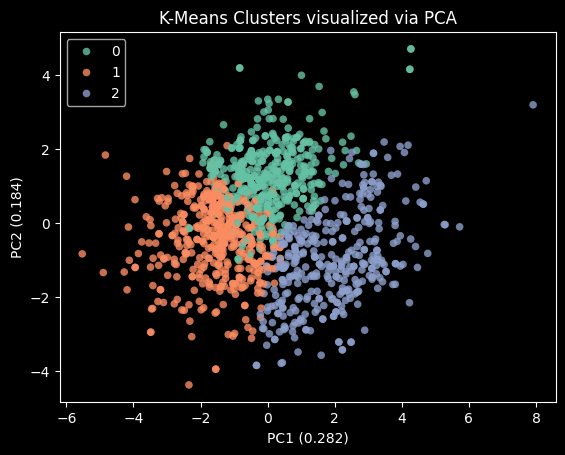

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
var_exp = pca.explained_variance_ratio_

xlab = f"PC1 ({var_exp[0]:.3f})"
ylab = f"PC2 ({var_exp[1]:.3f})"

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],
                hue=labels, palette="Set2", s=30, edgecolor="none", alpha=0.8)
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title("K-Means Clusters visualized via PCA")
plt.show()

It summarises all the features and displays the most important differences.
-> show if the wines are similar or unsimilar - even without knowing the quality

Another approach to see which feataures are more prominent in which cluster is by defining the mean of each cluster for each feature. This way we can not only see differences between the clusters, but also which feature is relatively high or low in which cluster. 
The following heatmap shows for example a high value for fixed acidity and citric acid in one cluster while another shows a very low value of these two.

         fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster                                                                 
0            -0.133730          0.036106    -0.001852        0.220944   
1            -0.706263          0.505821    -0.836074       -0.282364   
2             1.057487         -0.686051     1.064865        0.094830   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster                                                                   
0        -0.048843             0.788534              0.967992  0.228497   
1        -0.225032            -0.283909             -0.464320 -0.572760   
2         0.344390            -0.581545             -0.566716  0.454898   

               pH  sulphates   alcohol  
cluster                                 
0       -0.053871  -0.140061 -0.463231  
1        0.677047  -0.318186  0.196097  
2       -0.796147   0.571805  0.304378  


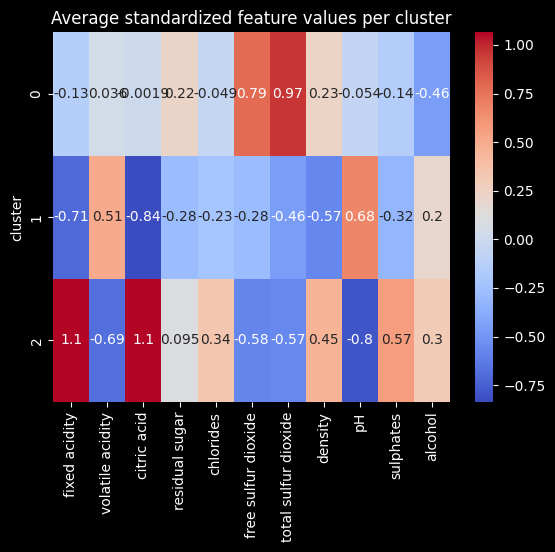

In [ ]:
cluster_means = df_scaled.groupby("cluster").mean()
print(cluster_means)

sns.heatmap(cluster_means, cmap="coolwarm", annot=True)
plt.title("Average standardized feature values per cluster")
plt.show()

To see if Clusters show differences in quality, we can compare these two features within a crosstable. One Cluster for example has a lot more datasets for quality value 7 than the other two. This could lead to the assumption, that correlations between other features could predict the quality of a wine.

In [ ]:
pd.crosstab(df["quality"], df_scaled["cluster"])

cluster,0,1,2
quality,,,
3,2,2,1
4,17,13,12
5,171,209,158
6,172,182,148
7,68,60,49
8,11,3,1


# 4 Data Model
Define what you want to model (following the table below) and choose an appropriate model framework. Define a simple baseline model and a loss function - theoretically and practically. Explain the model in terms of input-output data structures and dimensions.

### Supervised Learning: Linear Model x -> y

First, we need to define our model and loss function.

In [ ]:
model = nn.Sequential(nn.Linear(1, 1)) # n_in = 1, n_out = 1
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters())

In [ ]:
#ab hier noch nicht wirklich verstanden, was passiert

#TRAIN
x_tr = torch.as_tensor(X_train, dtype=torch.float32).view(-1, 1)
y_tr = torch.as_tensor(X_train, dtype=torch.float32).view(-1, 1)

#TEST
x_te = torch.as_tensor(X_test, dtype=torch.float32).view(-1, 1)
y_te = torch.as_tensor(X_test, dtype=torch.float32).view(-1, 1)

print(f"shape(x_tr): {x_tr.shape}")
print(f"shape(y_tr): {y_tr.shape}")

print(f"shape(x_te): {x_te.shape}")
print(f"shape(y_te): {y_te.shape}")

shape(x_tr): torch.Size([14069, 1])
shape(y_tr): torch.Size([14069, 1])
shape(x_te): torch.Size([3520, 1])
shape(y_te): torch.Size([3520, 1])


# 5 Train Model
Define Train and Test Data and run the training loop. Monitor the behaviour of the loss function.

In [ ]:
losses = []
model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    y_pred_tr = model(x_tr)
    loss = loss_func(y_pred_tr, y_tr)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# 6 Evaluate Model
Run model predictions on the test data set. Calculate and visualize the appropriate metrics to evaluate model performance. Explain why a separate test data set should be used for such evaluations.

In [ ]:
model.eval()
with torch.no_grad():
    y_pred_te = model(x_te)
    test_loss = loss_func(y_pred_te, y_te).item()

print("Final train loss:", losses[-1])
print("Test loss:", test_loss)
for name, p in model.named_parameters():
    print(name, p.detach())

Final train loss: 0.41520950198173523
Test loss: 0.4162142276763916
0.weight tensor([[0.8714]])
0.bias tensor([0.8500])


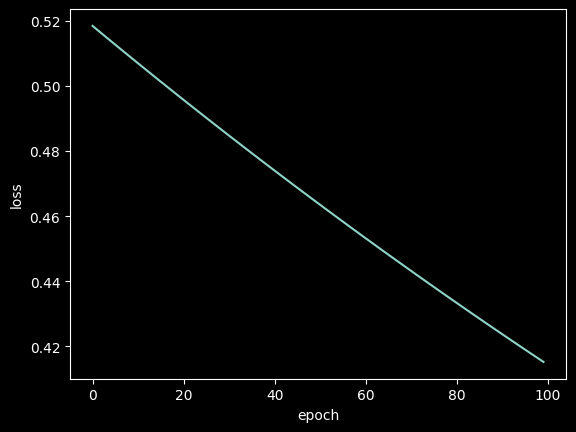

In [ ]:
plt.figure()
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

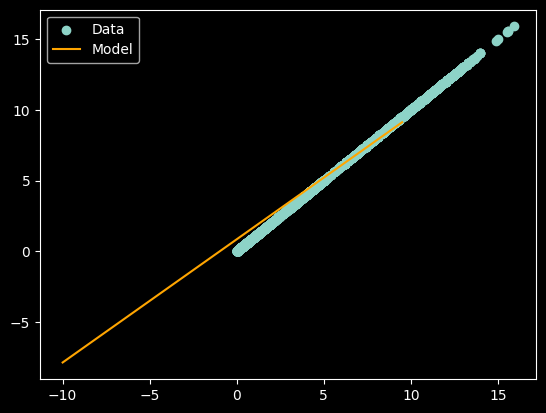

In [ ]:
# pick a range of new x-values (meaningful?)
x_new = np.arange(-10,10,0.5)
# convert to tensor
x_new_t = torch.as_tensor(x_new, dtype=torch.float32).view(-1, 1)
# run predictions
yp  = model(x_new_t)

# convert from tensor to numpy and reshape
y_pred = yp.detach().numpy().flatten()

plt.scatter(x_tr, y_tr, label="Data")
plt.plot(x_new,y_pred, c="orange", label="Model")
plt.legend()
plt.show()

# 7 Improve Model
Suggest extensions to your baseline model and repeat steps 4. - 6. Do these extensions improve the model?
- maybe max 3?
